In [2]:
import os
import zipfile
import tensorflow as tf

## 데이터 부르기

In [3]:
DATA_IN_PATH = './data_in/'

import os
import zipfile
DATA_IN_PATH = './data_in/'
file_list = os.listdir(DATA_IN_PATH)
print(file_list)
for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

## 데이터 확인

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)

In [6]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


> 1. 데이터 크기 <br>
> 2. 데이터의 개수 <br>
> 3. 각 리뷰의 문자 길이 분포 <br>
> 4. 많이 사용된 단어 <br>
> 5. 긍정, 부정 데이터의 분포
> 6. 각 리뷰의 단어 개수 분포 <br>
> 7. 특수 문자 및 대 소문자 소문자 비율 <br>

#### 파일데이터 사이즈

In [7]:
print('file size : ')
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        file_name = file.ljust(30)
        file_size = str(round(os.path.getsize(DATA_IN_PATH + file )/1000000, 2))
        print(file_name + file_size + 'MB')

file size : 
labeledTrainData.tsv          33.58MB
testData.tsv                  32.75MB
unlabeledTrainData.tsv        67.33MB


In [8]:
print ('전체 학습데이터 사이즈 : {}'.format(len(train_data)))

전체 학습데이터 사이즈 : 25000


In [9]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

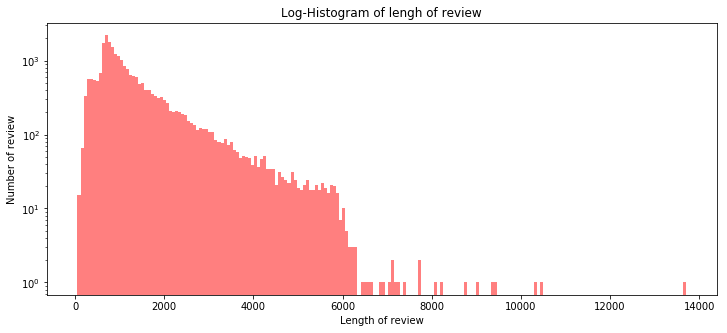

In [10]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of lengh of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [11]:
def print_data_info(data_name, data):
    print(data_name + ' 최대값: {}'.format(np.max(data)))
    print(data_name + ' 최솟값: {}'.format(np.min(data)))
    print(data_name + ' 평균값: {}'.format(np.mean(data)))
    print(data_name + ' 표준편차: {}'.format(np.std(data)))
    print(data_name + ' 중간값; {}'.format(np.median(data)))
    print(data_name + ' 제 1사분위: {}'.format(np.percentile(data, 25)))
    print(data_name + ' 제 3사분위: {}'.format(np.percentile(data, 75)))

In [12]:
print_data_info('리뷰 길이', train_length)

리뷰 길이 최대값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71056
리뷰 길이 표준편차: 1005.2191407969154
리뷰 길이 중간값; 983.0
리뷰 길이 제 1사분위: 705.0
리뷰 길이 제 3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0xfc98e10>,
 'caps': [<matplotlib.lines.Line2D at 0xfc014e0>,
 'boxes': [<matplotlib.lines.Line2D at 0xfc98978>],
 'medians': [<matplotlib.lines.Line2D at 0xfc01b70>],
 'fliers': [<matplotlib.lines.Line2D at 0xfc01f60>],
 'means': [<matplotlib.lines.Line2D at 0xfc01eb8>]}

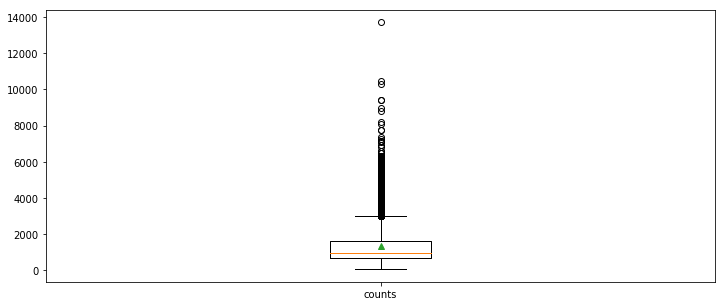

In [13]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

#### WordCloud 

(-0.5, 799.5, 599.5, -0.5)

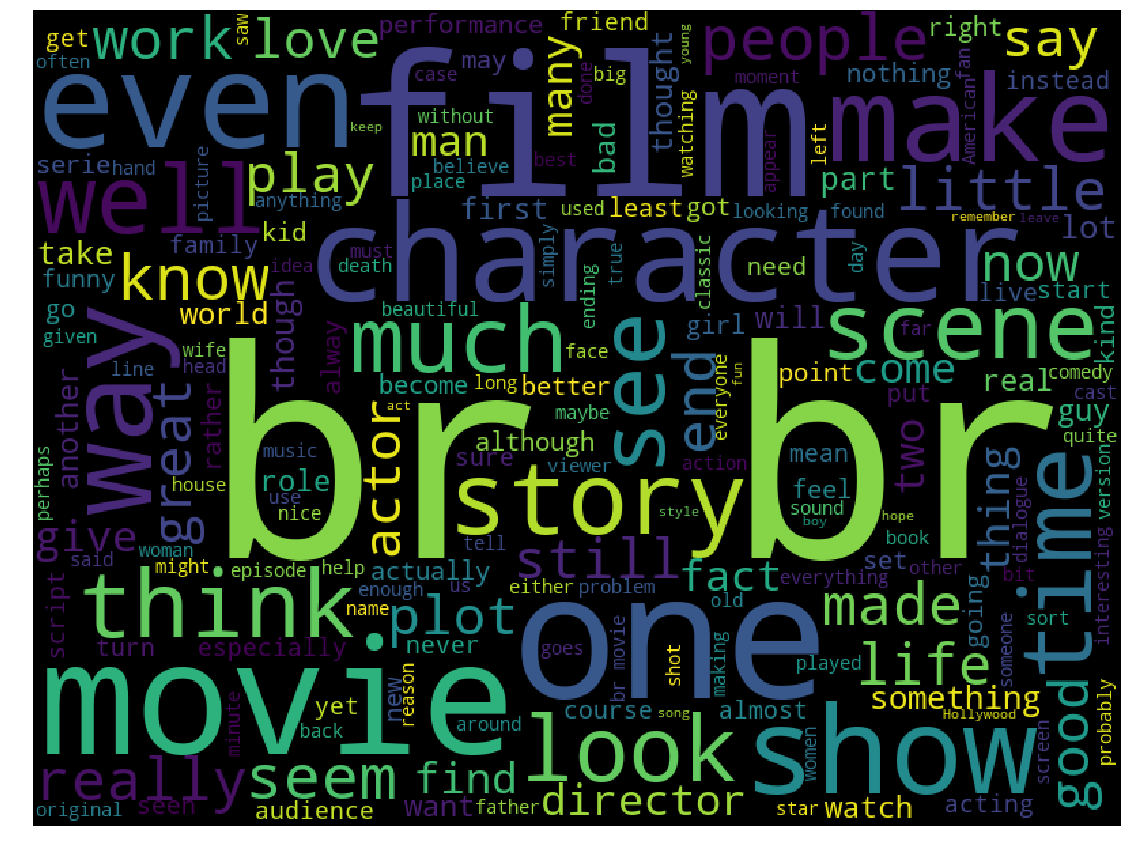

In [15]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

#### Seaborn 시각화

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


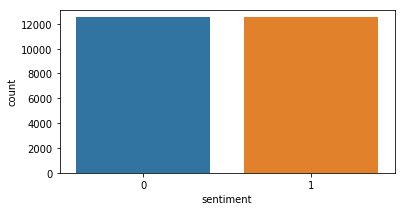

In [17]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])
print('긍정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[0]))

#### 각 review 의 단어수 출력

In [18]:
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))
train_word_counts.head()

0    433
1    158
2    378
3    379
4    367
Name: review, dtype: int64

Text(0, 0.5, 'Number of reviews')

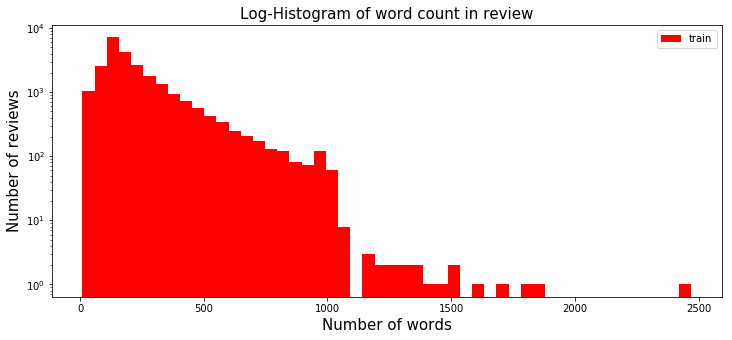

In [19]:
plt.figure(figsize=(12,5))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [20]:
print_data_info('리뷰 단어', train_word_counts)

리뷰 단어 최대값: 2470
리뷰 단어 최솟값: 10
리뷰 단어 평균값: 233.78624
리뷰 단어 표준편차: 173.74237015380743
리뷰 단어 중간값; 174.0
리뷰 단어 제 1사분위: 127.0
리뷰 단어 제 3사분위: 284.0


In [25]:
qmarks = np.mean(train_data['review'].apply(lambda x :'?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x : '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x : x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x : max(y.isupper() for y in x)))
numbers = np.mean(train_data['review'].apply(lambda x : max(y.isdigit() for y in x)))

print('물음표가 있는 질문 : {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문 : {:.2f}%'.format(fullstop * 100))
print('첫 문자가 대문자인 질문 : {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문 : {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문 : {:.2f}%'.format(numbers * 100))

물음표가 있는 질문 : 29.55%
마침표가 있는 질문 : 99.69%
첫 문자가 대문자인 질문 : 0.00%
대문자가 있는 질문 : 99.59%
숫자가 있는 질문 : 56.66%


In [27]:
import re
import pandas
import numpy as np
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

```python
import nltk
nltk.download('stopwords')
```

In [77]:
def preprocessing(review, remove_stopwords = False):
    # 1. Html 태그 제거
    review_text = BeautifulSoup(review, 'html5lib').get_text()
    
    # 2. 특수 문자 제거
    review_text = re.sub('[^a-zA-Z]', ' ', review)
    
    # 3. 대문자 → 소문자
    words = review_text.lower().split()
    
    # 4. 불용어 제거
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [ word for word in words if not word in stops]
        
    return ' '.join(words)

### 데이터 전처리 (Train)

In [78]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter='\t', quoting=3)

clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review, True))


In [79]:
clean_train_df = pd.DataFrame({'review': clean_train_reviews, 'sentiment': train_data['sentiment']})

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
#print(text_sequences[0])

word_vocab = tokenizer.word_index
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

In [80]:
train_inputs = pad_sequences(text_sequences, maxlen=174, padding='post')
train_labels = np.array(train_data['sentiment'])
print('Shape of train_inputs : ', train_inputs.shape)
print('Shape of train_lables : ', train_labels.shape)

Shape of train_inputs :  (25000, 174)
Shape of train_lables :  (25000,)


### 데이터 저장 (Train)

In [71]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os
if not os.path.exists(DATA_IN_PATH):
    os.mkdir(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

### 데이터 전처리 및 저장 (Test)

In [98]:
test_data = pd.read_csv(DATA_IN_PATH +'testData.tsv', header=0, delimiter='\t', quoting=3)
clean_test_review = []
for review in test_data['review']:
    clean_test_review.append(preprocessing(review, True))
clean_test_df = pd.DataFrame({'review':clean_test_review, 'id' :test_data['id']})
test_id = np.array(test_data['id'])

tokenizer.fit_on_texts(clean_test_review)
text_sequences = tokenizer.texts_to_sequences(clean_test_review)
test_inputs = pad_sequences(text_sequences, maxlen=174, padding='post')

# 저장
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index= False)

## 모델

In [99]:
# load data
DATA_OUT_PATH = './data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'
train_data = pd.read_csv(DATA_OUT_PATH + TRAIN_CLEAN_DATA, header=0, delimiter=',', quoting=3)
train_data.head()
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])
#print(sentiments)

### TF-IDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', sublinear_tf=True,
ngram_range=(1,3),max_features=5000)

X = vectorizer.fit_transform(reviews)

In [90]:
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 42
TEST_SPLIT = 0.2
y = np.array(sentiments)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)
print("Accuracy : {}".format(lgs.score(X_eval, y_eval)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 0.8592


In [100]:
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA, header=0, delimiter=',', quoting=3)

test_data_vec = vectorizer.transform(test_data['review'])
test_predicted = lgs.predict(test_data_vec)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [103]:
DATA_OUT_PATH = './data_out'

if not os.path.exists(DATA_OUT_PATH):
    os.mkdir(DATA_OUT_PATH)

ids = list(test_data['id'])
answer_dataset = pd.DataFrame( {'id': ids, 'sentiment':test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH+'lgs_tfidf_answer.csv')